# Creation of a Financial Derivative - Apple (AAPL)

Importing libraries 

In [41]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import os
import scipy.stats as si

## Data Collection

Historical Data of the stock price of AAPL was collected via Yahoo Finance library. 

In [42]:
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


### Log Return

#### The log return, the annualised average return and standard deviation were also calculated. 

In [43]:
data['Return'] = data['Adj Close'].pct_change()
data['Log Return'] = np.log(1+data['Return'])

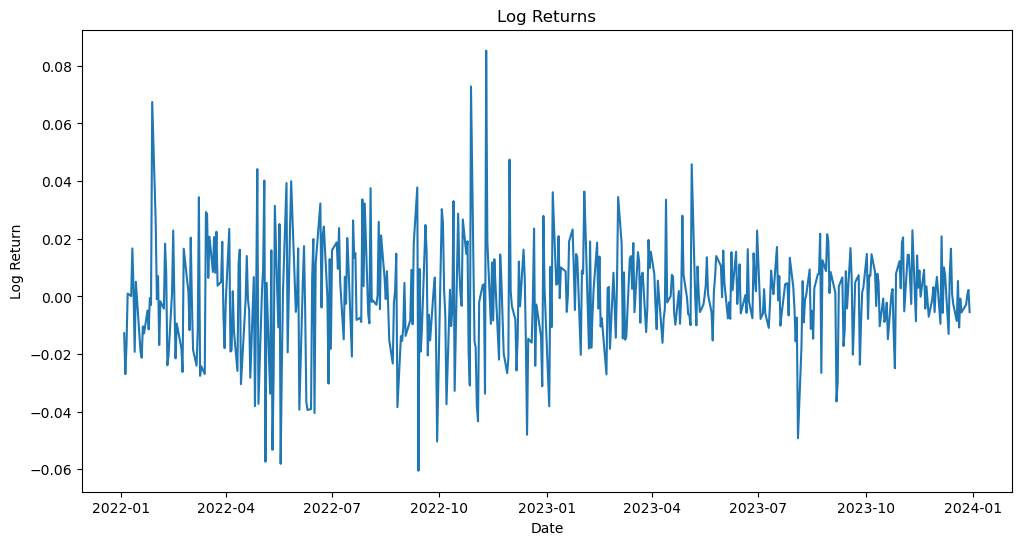

In [44]:
plt.figure(figsize=(12,6))
plt.plot(data['Log Return'])
plt.title('Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()

### Annualised Average Return 

In [45]:
avg_return = data['Return'].mean() * 252
print(f'Annualised Average Return:{avg_return * 100:.2f}%')

Annualised Average Return:7.62%


### Annualised Standard Deviation

In [46]:
std_dev = data['Return'].std() * np.sqrt(252)
print(f'Annualised Standard Deviation:{std_dev * 100:.2f}%')

Annualised Standard Deviation:29.08%


### Equity Plot Movement of AAPL

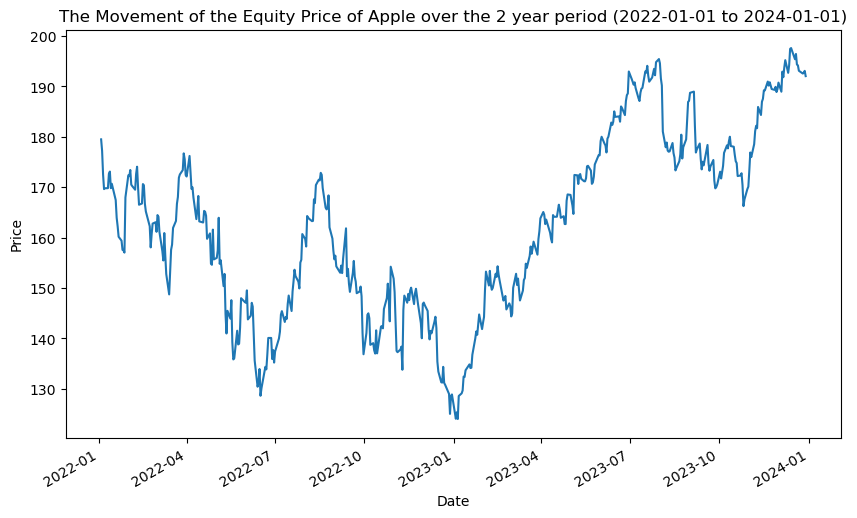

In [47]:
plt.figure(figsize = (10,6))
data ['Adj Close'].plot()
plt.title('The Movement of the Equity Price of Apple over the 2 year period (2022-01-01 to 2024-01-01)')
plt.xlabel('Date')
plt.ylabel ('Price')
plt.show()

# Option Pricing Models

In [48]:
data_ac = data['Adj Close']
data_ac.head()

Date
2022-01-03    179.481125
2022-01-04    177.203232
2022-01-05    172.489639
2022-01-06    169.610199
2022-01-07    169.777832
Name: Adj Close, dtype: float64

In [49]:
S0 = data_ac[-1:]     # spot price = 192.024185
K = 200               # strike price
T = 1                 # maturity 1 year
r = 0.05              # risk free rate 
sig = std_dev         # diffusion coefficient or volatility
N = 3                 # number of periods or number of time steps  
payoff = "put"        # payoff 

print(S0)

Date
2023-12-29    192.024185
Name: Adj Close, dtype: float64


### Binomial Tree 

### 1 - European Call Option

Step 1: Creating a Binomial Tree 

In [50]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

S = np.zeros((N + 1, N + 1))
S[0, 0] = float(S0.iloc[0])
z = 1
for t in range(1, N + 1):        #looping forwards, from 1 to N
    for i in range(z):           #looping forwards, from 0 to z-1
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1  

print('The binomial tree presenting Apple price over 3 time steps','\n',(S))

The binomial tree presenting Apple price over 3 time steps 
 [[192.02418518 227.12242636 268.63593513 317.73729615]
 [  0.         162.3498317  192.02418518 227.12242636]
 [  0.           0.         137.26118837 162.3498317 ]
 [  0.           0.           0.         116.04960494]]


In [51]:
print('The up factor u is',(u))

The up factor u is 1.1827803156349603


In [52]:
print('The down factor d is',(d))

The down factor d is 0.8454655414713788


In [53]:
print('The binomial tree presenting Apple price over 3 time steps ', '\n', (S))

The binomial tree presenting Apple price over 3 time steps  
 [[192.02418518 227.12242636 268.63593513 317.73729615]
 [  0.         162.3498317  192.02418518 227.12242636]
 [  0.           0.         137.26118837 162.3498317 ]
 [  0.           0.           0.         116.04960494]]


In [54]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
print ('Risk-neutral probability =',(p))

Risk-neutral probability = 0.5079551861899474


## Option value at each final nodes

In [55]:
S_T = S[:,-1]                          # stock prices at maturity 
V = np.zeros((N + 1, N + 1))           # start the option value matrix at maturity 
if payoff =="call":                    
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 37.6501683 ],
       [ 0.        ,  0.        ,  0.        , 83.95039506]])

## Option value at earlier nodes

In [56]:
# for European Option
for j in range(N-1, -1, -1): # Column. looping backwards. From N-1 to 0
    for i in range(j+1):  # Row. looping forwards. From 0 to j
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]) #the theoretical value at each node.
V

array([[22.72630342,  8.81657196,  0.        ,  0.        ],
       [ 0.        , 37.8620508 , 18.21936931,  0.        ],
       [ 0.        ,  0.        , 59.4331024 , 37.6501683 ],
       [ 0.        ,  0.        ,  0.        , 83.95039506]])

In [57]:
print('Binomial Tree & Option Price - European ' + payoff, str( V[0,0]))

Binomial Tree & Option Price - European put 22.726303423671293


In [102]:
S0 = data_ac[-1:]     # spot price = 192.024185
K = 200               # strike price
T = 1                 # maturity 1 year
r = 0.05              # risk free rate 
sig = std_dev         # diffusion coefficient or volatility
N = 3                 # number of periods or number of time steps  
payoff = "call"       # payoff 

print(S0)

Date
2023-12-29    192.024185
Name: Adj Close, dtype: float64


In [103]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor


In [104]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = float(S0.iloc[0])
z = 1
for t in range(1, N + 1):        #looping forwards, from 1 to N
    for i in range(z):           #looping forwards, from 0 to z-1
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1  

print('The binomial tree presenting Apple price over 3 time steps','\n',(S))


The binomial tree presenting Apple price over 3 time steps 
 [[192.02418518 227.12242636 268.63593513 317.73729615]
 [  0.         162.3498317  192.02418518 227.12242636]
 [  0.           0.         137.26118837 162.3498317 ]
 [  0.           0.           0.         116.04960494]]


In [105]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
print ('Risk-neutral probability =',(p))

Risk-neutral probability = 0.5079551861899474


In [106]:
S_T = S[:,-1]                          # stock prices at maturity 
V = np.zeros((N + 1, N + 1))           # start the option value matrix at maturity 
if payoff =="call":                    
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        , 117.73729615],
       [  0.        ,   0.        ,   0.        ,  27.12242636],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [107]:
# for European Option
for j in range(N-1, -1, -1): # Column. looping backwards. From N-1 to 0
    for i in range(j+1):  # Row. looping forwards. From 0 to j
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]) #the theoretical value at each node.
V

array([[ 24.5046037 ,  42.49577822,  71.94164437, 117.73729615],
       [  0.        ,   6.7686624 ,  13.54926373,  27.12242636],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [108]:
print('Binomial Tree & Option Price - European ' + payoff, str( V[0,0]))

Binomial Tree & Option Price - European call 24.504603704192494


### Monte Carlo Simulation

In [58]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) # loop trough time steps for simulations 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sig ** 2 / 2) * dt + sig * np.sqrt(dt) * rn[t])    
    return S

In [59]:
S2 = mcs_simulation_np(1000)

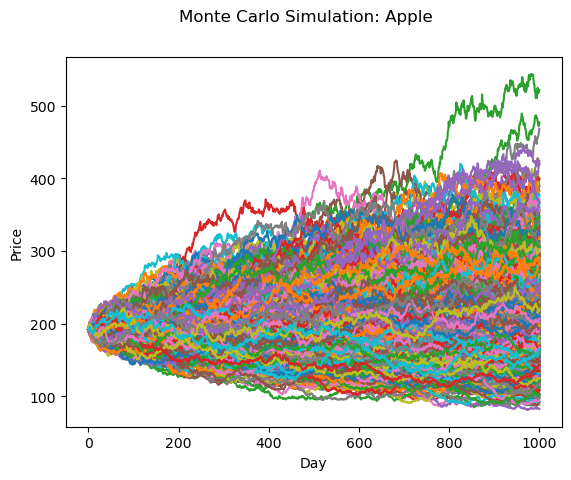

In [60]:
fig = plt.figure()
plt.plot(S2)
fig.suptitle('Monte Carlo Simulation: Apple')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [61]:
S2 = np.transpose(S2)
S2

array([[192.02418518, 193.67945046, 192.82266948, ..., 129.15189104,
        128.25194515, 128.84287265],
       [192.02418518, 190.68905134, 188.66406501, ..., 148.07077863,
        149.29322575, 149.24532526],
       [192.02418518, 190.83092611, 186.09006003, ..., 143.7552174 ,
        144.87944247, 145.38969834],
       ...,
       [192.02418518, 191.34419643, 189.67650617, ..., 236.04378304,
        237.18390647, 235.60589874],
       [192.02418518, 197.35873555, 198.70884224, ..., 216.13480102,
        219.09810268, 219.05135467],
       [192.02418518, 193.19313228, 193.25927901, ..., 157.52277044,
        159.71877474, 161.58676165]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

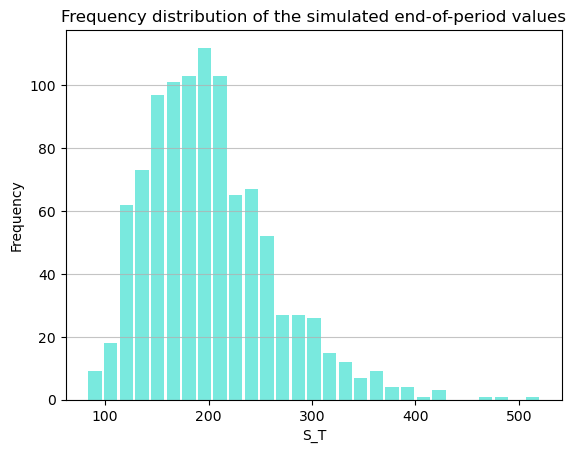

In [113]:
n, bins, patches = plt.hist(x=S2[:,-1], bins='auto', color='#40E0D0',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

# p = np.exp(-r*T)*np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

In [111]:
c = np.exp(-r*T)*np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 34.448707618494815


# Greeks Analysis

### Black Scholes Model

In [64]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * std_dev ** 2) * T) / (std_dev * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * std_dev ** 2) * T) / (std_dev * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [65]:
bsm = euro_option_bsm(S0, K, T, r, 0, std_dev, 'put')            #q: dividend = 0
print('Black-scholes & Option price - European put', str(put))

Black-scholes & Option price - European put 22.95423107181846


## Delta

In [66]:
def delta(S, K, T, r, q, vol, payoff):
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta = -np.exp(-q * T) * norm.cdf(-d1, 0.0, 1.0)
    return delta

In [67]:
delta(S0, K, T, r, 0, std_dev, 'put')

array([-0.4296061])

In [71]:
S_range = np.linspace(100, 300, 100)

In [72]:
delta_put = [delta(S, K, T, r, q, sig, "put") for S in S_range]

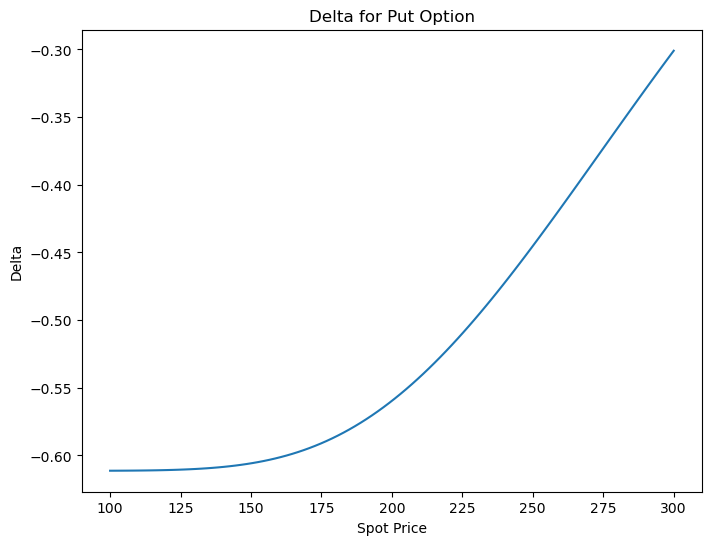

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(S_range, delta_put)
plt.title("Delta for Put Option")
plt.xlabel("Spot Price")
plt.ylabel("Delta")
plt.show()

### Surface of Delta

In [75]:
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta = si.norm.cdf(d1, 0.0, 1.0) - 1
    
    return delta

In [76]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 105, T[i], 0.04, 0.3, 'call')

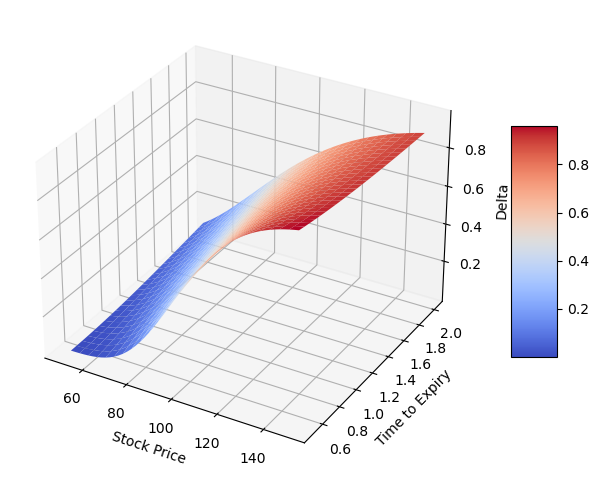

In [77]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
#rstride: the array of row stride (step size) cstride: the array of column stride.
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Gamma

In [89]:
def gamma(S, K, T, r, q, vol):
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma_val = np.exp(-q * T) * norm.pdf(d1, 0.0, 1.0) / (S * vol * np.sqrt(T))
    return gamma_val

In [90]:
K = 200  # strike price
T = 1  # time to maturity
r = 0.05  # risk-free rate
q = 0  # dividend yield
vol = std_dev  # volatility

In [91]:
S_range = np.linspace(100, 300, 100)
gamma_values = [gamma(S, K, T, r, q, vol) for S in S_range]

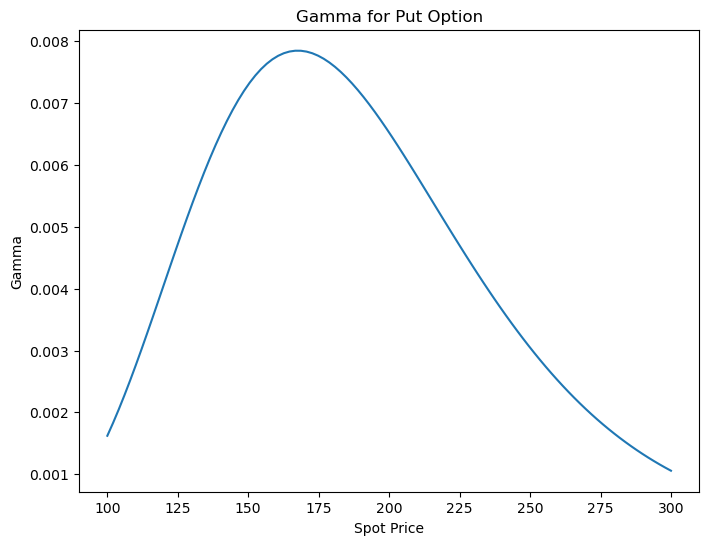

In [92]:
plt.figure(figsize=(8, 6))
plt.plot(S_range, gamma_values)
plt.title("Gamma for Put Option")
plt.xlabel("Spot Price")
plt.ylabel("Gamma")
plt.show()

### Surface of Gamma 

In [94]:
def gamma(S, K, T, r,  vol, payoff):
    
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)

    
    
    return gamma

In [95]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 105, T[i], 0.04, 0.3, 'call')

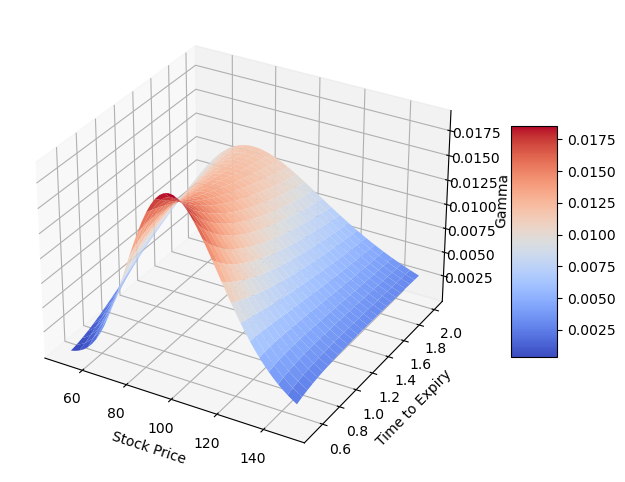

In [96]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Theta

In [101]:
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoff == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta